# Проект для «Викишоп»

<div style="border:solid blue 2px; padding: 20px">
Привет Георгий! Меня зовут Андрей Петрушин, я буду проверять твой проект. Предлагаю общаться на «ты», это упрощает коммуникацию :) Но если это некомфортно - можем перейти на “Вы”.

Вижу, проведена большая работа над проектом и он выполнен на хорошем уровне. Моя основная цель при проверке работы — помочь сделать проект лучше и возможно, поделиться своим опытом решения подобных задач

Я буду делать комментарии тремя цветами:
    
<font color="green">✔️ Комментарий ревьювера    
зеленый - все отлично, хорошее решение</font>    

<font color="brown">⚠️ Комментарий ревьювера     
Коричневый - есть рекомендации, в другой раз можно сделать иначе</font>
    
<font color="red">❌Комментарий ревьювера     
красный - есть недочеты, их нужно исправить и проект будет принят</font>
    
Пожалуйста, не удаляй мои комментарии, нам обоим будет проще разобраться в недочетах, что и как исправлено. Желательно реагировать на каждый оранжевый и красный комментарии. Свои комментарии тоже отмечай, например другим цветом или надписью “Комментарий студента”. 

\<font color='darkblue'> Этот код позволяет менять цвет текста. \</font>
</div>


Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

<font color="green">✔️Комментарий ревьювера    
Отлично, что приведено описание задачи и план исследования - это очень важная часть любого проекта.</font>


## Подготовка

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# from pymystem3 import Mystem

import re
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<font color="green">✔️ Комментарий ревьювера     
Верно -  весь импорт библиотек в начале проекта</font>


In [2]:
# data = pd.read_csv(r"C:\Users\George\Мой диск\3 Практикум\2 Проекты\13 Машинное обучение для текстов\toxic_comments.csv")
data = pd.read_csv('/datasets/toxic_comments.csv')
data

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


Не рабочий код:
```python
m = Mystem()
def lemmatize_text(text):    
    text = text.lower()
    lemm_text = "".join(m.lemmatize(text))
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())
```

In [3]:
m = WordNetLemmatizer()

def lemmatize_text(text):    
    text = text.lower()
    word_list = nltk.word_tokenize(text)    
    lemm_text = ' '.join([m.lemmatize(w) for w in word_list])
    cleared_text = re.sub(r'[^a-zA-Z]', ' ', lemm_text) 
    return " ".join(cleared_text.split())

<font color="red">❌ Комментарий ревьювера          
Увы, метод лемматизации pymystem3 сделан только для русского текста, его нельзя применять   
По ссылке есть несколько методов лемматизации:  https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/   
Ты мог сам это заметить - она ведь не сработала :)  Должно быть "d aww he match this background colour"
Очистка текста правильная!   
</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Исправил
</div>

<font color="green">✔️ Комментарий ревьювера 2     
Верно</font>


In [4]:
# Проверим работоспособность функции
print(data.loc[1, 'text'])
print()
print(lemmatize_text(data.loc[1, 'text']))

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)

d aww he match this background colour i m seemingly stuck with thanks talk january utc


In [5]:
%%time

data['text'] = data['text'].apply(lemmatize_text)
data

CPU times: user 1min 59s, sys: 105 ms, total: 2min
Wall time: 2min 1s


,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he match this background colour i m seem...,0
2,hey man i m really not trying to edit war it s...,0
3,more i ca n t make any real suggestion on impr...,0
4,you sir are my hero any chance you remember wh...,0
...,...,...
159566,and for the second time of asking when your vi...,0
159567,you should be ashamed of yourself that is a ho...,0
159568,spitzer umm there no actual article for prosti...,0
159569,and it look like it wa actually you who put on...,0


,toxic,percent
0,143346,0.898
1,16225,0.102


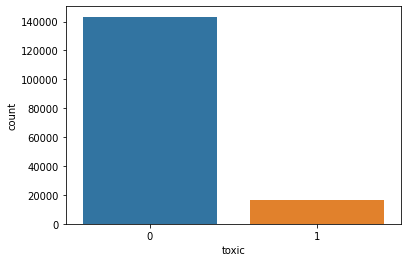

In [6]:
sns.countplot(x = 'toxic', data = data)

table = pd.DataFrame(data['toxic'].value_counts())
table['percent'] = (table['toxic']/table['toxic'].sum()).round(3)
table

<font color="green">✔️Комментарий ревьювера    
Отлично, что проверен дисбаланс данных.</font>


In [7]:
data_toxic = data[data['toxic'] == 1]
data_not_toxic = data[data['toxic'] == 0]

In [8]:
final_data = data_toxic.sample(15000)
final_data = final_data.append(data_not_toxic.sample(15000))
final_data = final_data.reset_index(drop=True)
final_data

,text,toxic
0,who are you i must admit you are not the most ...,1
1,you need to fuck off and stop hrassing people,1
2,chickenshit vikie addict you are a liar about ...,1
3,thank you for showing me just how much of jack...,1
4,p also guy i know we are lazy a fuck but come ...,1
...,...,...
29995,it is interesting to note that both aircraft l...,0
29996,family genealogy section addition while many s...,0
29997,well dark green is the color of islam so light...,0
29998,this is your last warning the next time you va...,0


<font color="green">✔️Комментарий ревьювера    
Отлично, проверил.</font>

In [9]:
final_data['toxic'].value_counts()

0    15000
1    15000
Name: toxic, dtype: int64

## Обучение

In [10]:
target = final_data['toxic']
features = final_data.drop(['toxic'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)

In [11]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(24000, 1)
(6000, 1)
(24000,)
(6000,)


<font color="brown">⚠️ Комментарий ревьювера   
Всегда желательно выводить размерность выборок :)</font>


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    Исправил
</div>

<font color="green">✔️ Комментарий ревьювера 2     
Верно</font>


In [12]:
# nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

In [13]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

<font color="brown">⚠️ Комментарий ревьювера   
Бывает интересно поменять дефолтные значения TfidfVectorizer. Например c ngram_range, max_df, min_df. Подробнее см. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html</font>


In [14]:
features_train = count_tf_idf.fit_transform(features_train['text'].values)

In [15]:
features_test = count_tf_idf.transform(features_test['text'].values)

<font color="red">❌ Комментарий ревьювера          
У нас датасет на английском языке, поэтому перевод в юникод не требуется. Это увеличит количество потребляемой памяти, а ядро в тренажере может упасть</font>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    На этом моменте у меня ломается ядро и я не понимаю почему. Проект еще есть куда доделывать, но пока нужно понять что делать с этим.
</div>

<font color="brown">⚠️ Комментарий ревьювера   
Единственный вариант - сократить размер базы. По опыту этого датасета - рекомендую 2000 оставить :)</font>


У нас есть признаки, осталось только обучить модели и выбрать из них лучшую.

### Логическая регрессия

In [16]:
model_lr = LogisticRegression(random_state=12345)
model_lr.fit(features_train, target_train)

linear_result = cross_val_score(model_lr, features_train, target_train, cv=5, scoring='f1').mean()
linear_result

0.8782759790709156

### Дерево решений

Воспользуемся GridSearchCV чтобы подобрать лучшие гиперпараметры

In [17]:
%%time

model = DecisionTreeClassifier()

parametrs = { 'max_depth': range(1, 41) }

grid = GridSearchCV(estimator=model, cv=5, param_grid=parametrs)
grid.fit(features_train, target_train)

grid.best_params_

CPU times: user 5min 43s, sys: 497 ms, total: 5min 43s
Wall time: 5min 43s


{'max_depth': 40}

In [18]:
model_dt = DecisionTreeClassifier(max_depth=40, random_state=12345)
model_dt.fit(features_train, target_train)

decision_tree_result = cross_val_score(model_dt, features_train, target_train, cv=5, scoring='f1').mean()
decision_tree_result

0.76813566599516

### Случайный лес

In [19]:
model = RandomForestClassifier()

parametrs = { 'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2) }
#               'min_samples_leaf': range(1, 8),
#               'min_samples_split': range(2, 11, 2) }

grid = GridSearchCV(estimator=model, cv=5, param_grid=parametrs)
grid.fit(features_train, target_train)

grid.best_params_

{'max_depth': 9, 'n_estimators': 50}

In [20]:
model_rf = RandomForestClassifier(max_depth=11, n_estimators=50, random_state=12345)
model_rf.fit(features_train, target_train)

random_forest_result = cross_val_score(model_rf, features_train, target_train, cv=5, scoring='f1').mean()
random_forest_result

0.7835088483159176

In [21]:
# Построим таблицу с результатами моделей
data = {'F1_score' : [linear_result, decision_tree_result, random_forest_result]}
total_results = pd.DataFrame(data=data, index=['Логическая регрессия', 'Дерево решений', 'Случайный лес'])
total_results

,F1_score
Логическая регрессия,0.878276
Дерево решений,0.768136
Случайный лес,0.783509


Можно сделать вывод, что у логической регрессии наилучший показатель

✔️Комментарий ревьювера 2    
Отлично, хороший результат у  логической регрессии !

## Выводы

In [22]:
print(f1_score(target_test, model_lr.predict(features_test)))

0.884174508126604


✔️Комментарий ревьювера 2    
Отлично


В этой работе была разработана модель которая умеет классифицировать комментарии на позитивные и негативные. И лучший показатель `f1_score` получился 0.88, что намного больше поставленной в условии задачи - 0.75

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [ ]  Выводы написаны

<font color="green">✔️ Комментарий ревьювера 2       
Молодец, хорошая работа над проектом, выполнены все пункты задания. 

<font color="green">✔️ Комментарий ревьювера 2    
После проекта обычно просят оценить работу ревьювера, оставить отзыв - поставь пожалуйста оценку, если не сложно  :). Это помогает улучшить нашу работу. Только оценивай, честно, как есть!</font>



Для работы с текстами используют и другие подходы. Например, сейчас активно используются трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться.   
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.   
https://huggingface.co/transformers/model_doc/bert.html   
https://t.me/renat_alimbekov    
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены     
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд по трансформеру от создателей pytorch    
https://transformer.huggingface.co/ - поболтать с трансформером    
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множество реализованных методов для трансформеров методов NLP
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html  
</font>
